#                                  Micro-Credit Defaulter Model

### Problem Statement: 

    A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
    
    Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
    
    Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

    We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
    
    They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
    
    They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

    The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

#### Define Required Libraries

In [1]:
#as of now we are importing the pandas and numpy libraries remainig will be imported at the time of required while we moving a head
import pandas as pd
import numpy as np

#### Data Cleansing and Wrangling.

In [2]:
# first we are going to download the data
data=pd.read_csv('Data file.csv')


In [3]:
# after loading of data into the notebook lets have a look into the various columns in the data set and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

#### Observations:
    1.there are 37 columns in the data set with each field witht the maximum entries of 209593
    2.out of 37 columns float data types are 21, 13 int data types and 3 string data types in the data
    

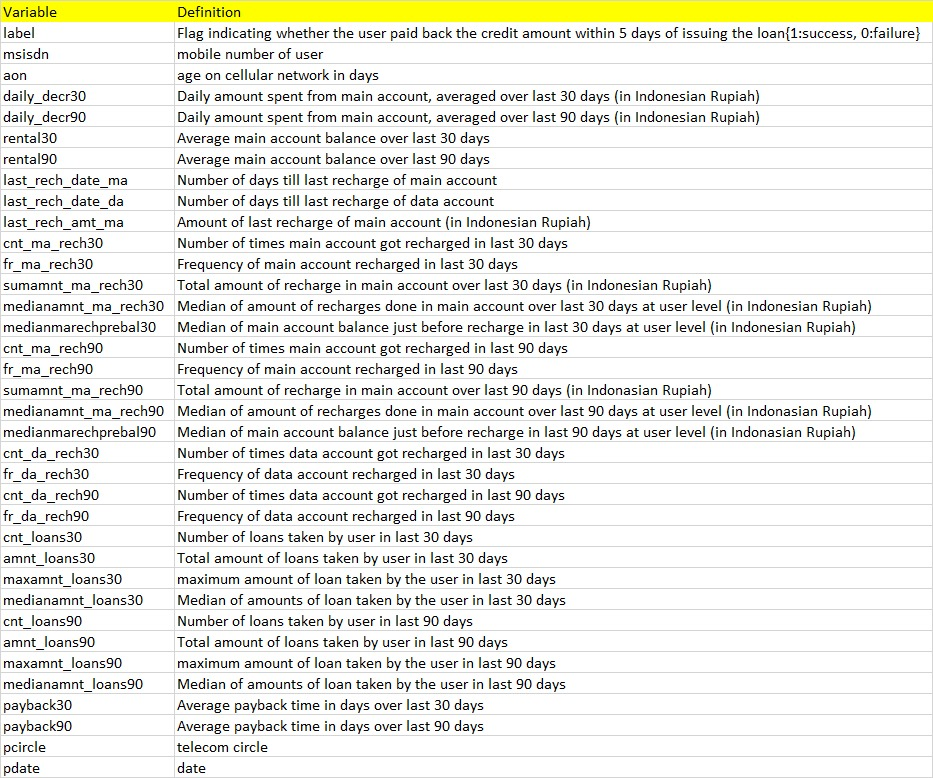

In [4]:
# checking for the null values
data.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

#### obseravtions:
    no null values are present in the data, so there is no need to worry about the missing values replacement.

#### Data Cleansing and Wrangling.

In [5]:
# Loading the data set into the data frame
mcd=pd.DataFrame(data)

In [6]:
# Unnamed: 0  column is not useful column at all so we can drop it 
mcd.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# as of now the data types are good enough to go no need to change the data types.

### EDA(exploratory data analysis)

#### I. Statistical Analysis

In [8]:
d=mcd.describe(include='all')
for i in d:
    print(d[i])

count     209593.000000
unique              NaN
top                 NaN
freq                NaN
mean           0.875177
std            0.330519
min            0.000000
25%            1.000000
50%            1.000000
75%            1.000000
max            1.000000
Name: label, dtype: float64
count          209593
unique         186243
top       04581I85330
freq                7
mean              NaN
std               NaN
min               NaN
25%               NaN
50%               NaN
75%               NaN
max               NaN
Name: msisdn, dtype: object
count     209593.000000
unique              NaN
top                 NaN
freq                NaN
mean        8112.343445
std        75696.082531
min          -48.000000
25%          246.000000
50%          527.000000
75%          982.000000
max       999860.755200
Name: aon, dtype: float64
count     209593.000000
unique              NaN
top                 NaN
freq                NaN
mean        5381.402289
std         9220.623400
min 

#### observations:
        1. label is our target column in which there are no null values, 0 and 1 are the values present in the 209593 
        entries
        2. as per the msisdn field the data is collected for 186243 unique mobile numbers
        3. as per the aon column age of network usage never be in negative so we can replace the -ve values with median
        but there are days which are more than 3650 it mean data more than 10 years we can delete that data.
        4. as per daily_decr30,daily_decr90 columns it is clear that the people are using the micro credite scheme amount
        but the std is very high in this as compared to mean, there is lot of difference between the percentiles, 
        min and max values
        and also the daily spent amount will never be negative, so we are going to replace the -ve values with median
        5. as per rental30 and rental90 some people having the -ve account balance means having debts to them.their mean and 
        std has 
        high variation, percentiles and min, max values are also having high differences.
        but main account also not be a -ve value allowed is the utmost zero only, so replacing the -ve values with median
        6. as we can see that the values in last_rech_date_ma, last_rech_date_da are very high which we are going to replace 
        them with the age of networkdays where age of network days are less than the last recahrge days.
        7.as we can see that the last_rech_amt_ma column has high std compared to its mean and there is a huge difference in 
        the percentiles also
        8. as cnt_ma_rech30 and fr_ma_rech30 represents the same value we are going to drop the fr_ma_rech30 and 
        fr_ma_rech90 this
        is same for data account.
        9. In cnt_loans30, amnt_loans30 columns mean and std are almost equal which is not a good sign.
        10.p circle is for one area only we can drop that column
        11.we are going to split the date column in day,month,year

In [9]:
mcd['pdate']=mcd['pdate'].str.split('-')

In [10]:
mcd['pdate'].head(2)

0    [7/20/2016]
1    [8/10/2016]
Name: pdate, dtype: object

In [11]:
#creating the day column
mcd['pday']=mcd['pdate'].str[2]

In [12]:
#creating the month and year column
mcd['pmonth']=mcd['pdate'].str[1]
mcd['pyear']=mcd['pdate'].str[0]

In [13]:
#finally dropping the date column
mcd.drop(['pdate'],axis=1,inplace=True)

In [14]:
# dropping the pcircle column as it has unique value
mcd.drop(['pcircle'],axis=1,inplace=True)

In [15]:
# dropping the fr_da_rech30 and 90 columns
mcd.drop(['fr_da_rech30'],axis=1,inplace=True)
mcd.drop(['fr_da_rech90'],axis=1,inplace=True)

In [16]:
# dropping the fr_ma_rech30 column
mcd.drop(['fr_ma_rech30'],axis=1,inplace=True)

In [17]:
# dropping the fr_ma_rech90
mcd.drop(['fr_ma_rech90'],axis=1,inplace=True)

In [18]:
# we are going to replace the last_rech_date_ma, last_rech_date_da -ve values with median of the column

mcd['last_rech_date_ma'].replace([mcd[mcd['last_rech_date_ma']<=0]['last_rech_date_ma']],mcd['last_rech_date_ma'].median(),inplace=True)
mcd['last_rech_date_da'].replace([mcd[mcd['last_rech_date_da']<=0]['last_rech_date_da']],mcd['last_rech_date_da'].median(),inplace=True)

In [19]:
mcd['last_rech_date_ma'].describe(), mcd['last_rech_date_ma'].count()

(count    209593.000000
 mean       3756.302548
 std       53905.860521
 min           1.000000
 25%           2.000000
 50%           3.000000
 75%           7.000000
 max      998650.377700
 Name: last_rech_date_ma, dtype: float64,
 209593)

In [20]:
# replacing un even values with the correct values for last_rech_date_ma
n=1
for i in range(0,mcd['last_rech_date_ma'].count()):
    if mcd['last_rech_date_ma'][i]>mcd['aon'][i]:
        mcd['last_rech_date_ma'][i]=mcd['aon'][i]
        
        n=n+1
print(n)

<ipython-input-20-3096f442936a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd['last_rech_date_ma'][i]=mcd['aon'][i]


2577


In [21]:
# replacing un even values with the correct values for last_rech_date_ma
n=1
range(mcd['last_rech_date_da'].count())
for i in range(mcd['last_rech_date_da'].count()):
    if mcd['last_rech_date_da'][i]>mcd['aon'][i]:
        mcd['last_rech_date_da'][i]=mcd['aon'][i]
        
        n=n+1
print(n)

<ipython-input-21-fe810d5ed92f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd['last_rech_date_da'][i]=mcd['aon'][i]


2757


In [22]:
mcd['last_rech_date_da'].describe()

count    209593.000000
mean         30.022131
std        4264.229084
min         -48.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      925241.663500
Name: last_rech_date_da, dtype: float64

In [23]:
mcd['last_rech_date_ma'].describe()

count    209593.000000
mean         48.941112
std        5562.731974
min         -48.000000
25%           2.000000
50%           3.000000
75%           7.000000
max      982755.069000
Name: last_rech_date_ma, dtype: float64

In [24]:
# we are going to replace the -ve values with median in rental30 and rental90
mcd['rental30'].replace([mcd[mcd['rental30']<=0]['rental30']],mcd['rental30'].median(),inplace=True)
mcd['rental90'].replace([mcd[mcd['rental90']<=0]['rental90']],mcd['rental90'].median(),inplace=True)

In [25]:
mcd['rental30'].describe()

count    209593.000000
mean       2772.190589
std        4264.253158
min           0.040000
25%         415.740000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64

In [26]:
mcd[mcd['daily_decr30']<=0]['daily_decr30']

74       -2.166667
78       -0.250000
96       -0.900000
109      -0.400000
273      -0.481667
            ...   
209477    0.000000
209512   -0.500000
209520    0.000000
209541    0.000000
209584    0.000000
Name: daily_decr30, Length: 5983, dtype: float64

In [27]:
# we are going to replace the -ve values with median in daily_decr30 and daily_decr90
mcd['daily_decr30'].replace([mcd[mcd['daily_decr30']<=0]['daily_decr30']],mcd['daily_decr30'].median(),inplace=True)
mcd['daily_decr90'].replace([mcd[mcd['daily_decr90']<=0]['daily_decr90']],mcd['daily_decr90'].median(),inplace=True)

In [28]:
mcd['daily_decr30'].describe()

count    209593.000000
mean       5423.355587
std        9199.359441
min           0.000667
25%          53.500000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64

In [29]:
# there are 1523 entries with -ve values 
mcd['aon'].replace([mcd[mcd['aon']<=0]['aon']],mcd['aon'].median(),inplace=True)

In [30]:
mcd['aon'].count(), mcd.size

(209593, 6916569)

In [31]:
# we are going to drop the rows with aon value greater than 3650 i.e data value of more than 10 years
n=1
for i in range(mcd['aon'].count()):
    if mcd['aon'][i]>3650:
        mcd.drop([i],axis=0,inplace=True)
        n=n+1
print(n)

2090


In [32]:
mcd['aon'].count(), mcd.size

(207504, 6847632)

In [33]:
mcd['daily_decr30'].count()

207504

#### visual analysis

#### 1.univarient analysis

In [34]:
# importing the visual libraries
import seaborn as sns
import matplotlib.pyplot as plt


Bad key savefig.frameon in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc fil

In [35]:
no=[]
o=[]
for i in mcd.columns:
    if mcd[i].dtype!=object:
        no.append(i)
    else:
        o.append(i)

In [36]:
len(no)

31

In [37]:
o

['msisdn', 'pyear']

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

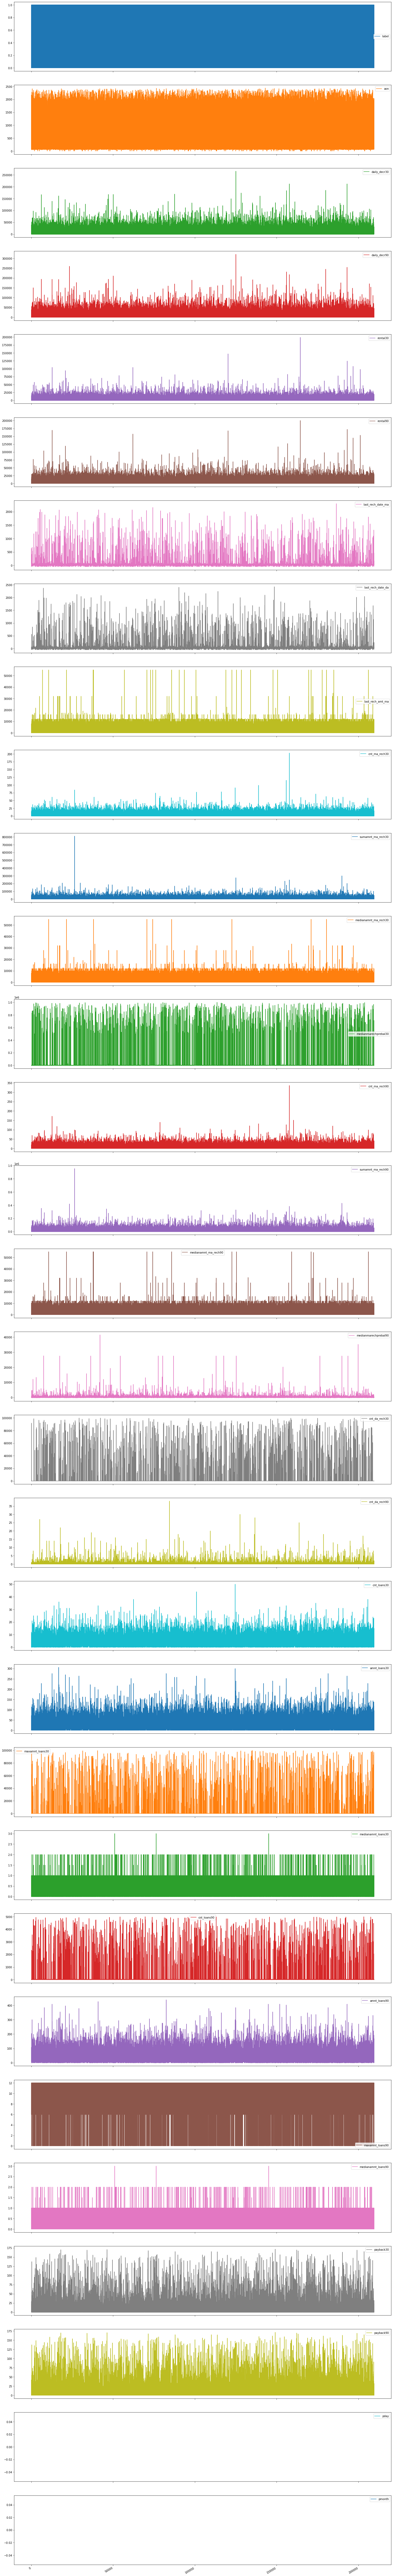

In [42]:
mcd[no].plot(kind='line',subplots=True,layout=(32,1),figsize=(25,200))

#### Observations:
    1.daily_decr30 has maximum value of 250000 and the average value of 75000
    2.daily_decr90 has the mediaum value of 75000 and maximum value of 275000
    3.rental30 has maximum value of 190000 with average value of 45000
    4.rental90 has maximum value of 19000 with average value of 45000
    5.last_rech_date_ma has maximum value of 2500 and the major data was located at 1050.
    6.last_rech_date_da has maximum value of 2300 and the ajor data located at 1000.
    7.last_rech_amt_ma has maximum value of 51000 witht the major value located in between 10000 to 15000
    8.cnt_ma_rech30 has maximum value of 180 with major located at 12 to 25
    9.sumamnt_ma_rech30 has a maximum value of 300000 along with the major data concentrated at 7500 to 10000
    10.medianamnt_ma_rech30 has a maximum value of 55000 and the major data was located in between the 7500 to 12000
    11.sumamnt_ma_rech90 has the major data in between 75000 to 125000
    12.cnt_da_rech90 has the major values located between .75 to 4
    13.cnt_loans30 has the most values in between the 7.5 to 15
    14.amnt_loans30 has the data located in between the 45 to 125
    15.maxamnt_loans30 has a high up and downs with the max value at 95000 
    16.payback30,payback90 major concentrated on 25 to 45 means people tend to pay the loan amount in those days.

In [ ]:
# visually checking for the outliers through box plot

label                   AxesSubplot(0.125,0.860236;0.775x0.0197644)
aon                     AxesSubplot(0.125,0.836518;0.775x0.0197644)
daily_decr30            AxesSubplot(0.125,0.812801;0.775x0.0197644)
daily_decr90            AxesSubplot(0.125,0.789084;0.775x0.0197644)
rental30                AxesSubplot(0.125,0.765366;0.775x0.0197644)
rental90                AxesSubplot(0.125,0.741649;0.775x0.0197644)
last_rech_date_ma       AxesSubplot(0.125,0.717932;0.775x0.0197644)
last_rech_date_da       AxesSubplot(0.125,0.694215;0.775x0.0197644)
last_rech_amt_ma        AxesSubplot(0.125,0.670497;0.775x0.0197644)
cnt_ma_rech30            AxesSubplot(0.125,0.64678;0.775x0.0197644)
sumamnt_ma_rech30       AxesSubplot(0.125,0.623063;0.775x0.0197644)
medianamnt_ma_rech30    AxesSubplot(0.125,0.599346;0.775x0.0197644)
medianmarechprebal30    AxesSubplot(0.125,0.575628;0.775x0.0197644)
cnt_ma_rech90           AxesSubplot(0.125,0.551911;0.775x0.0197644)
sumamnt_ma_rech90       AxesSubplot(0.125,0.5281

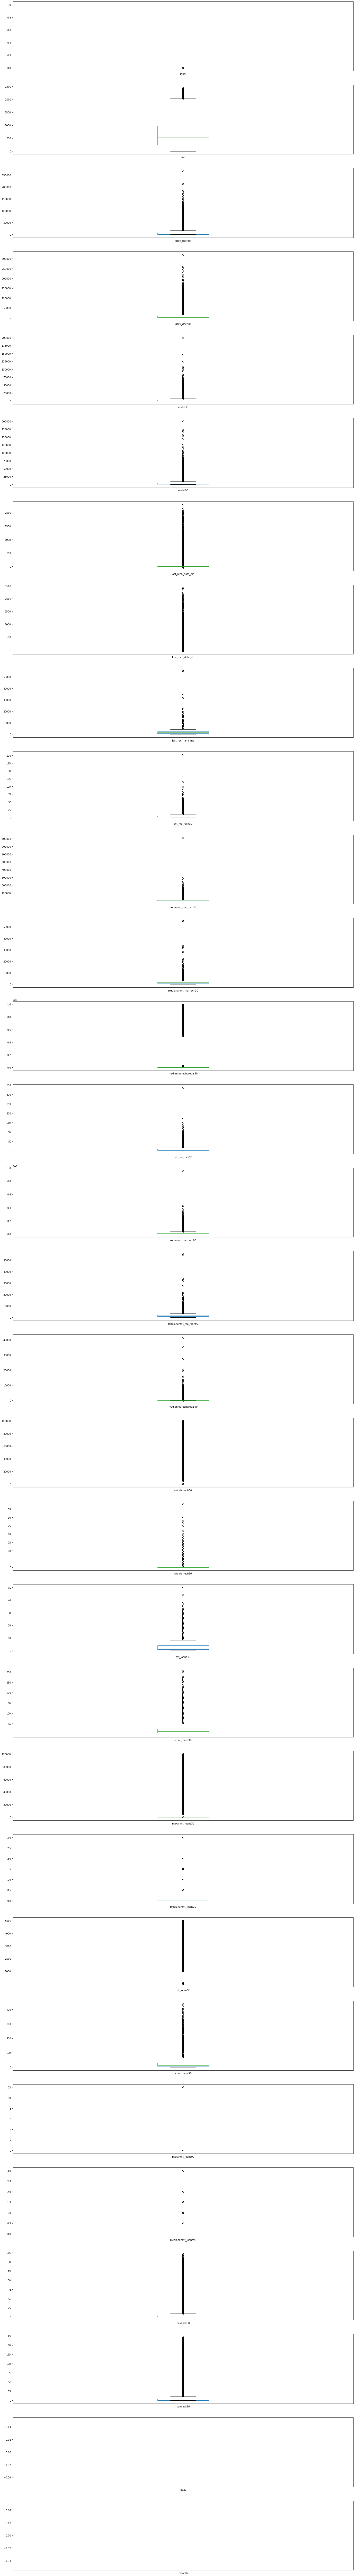

In [43]:
mcd[no].plot(kind='box',subplots=True,layout=(32,1),figsize=(25,200))

#### Observations:
    all the data columns has outliers heavily
    we have to calculte the z score and have to filter the zscore values of data greater than 3 so that in such a 
    way we can remove the 
    outliers from the data.
    Data without the outliers is the best data for the further study analysis.

array([[<AxesSubplot:>]], dtype=object)

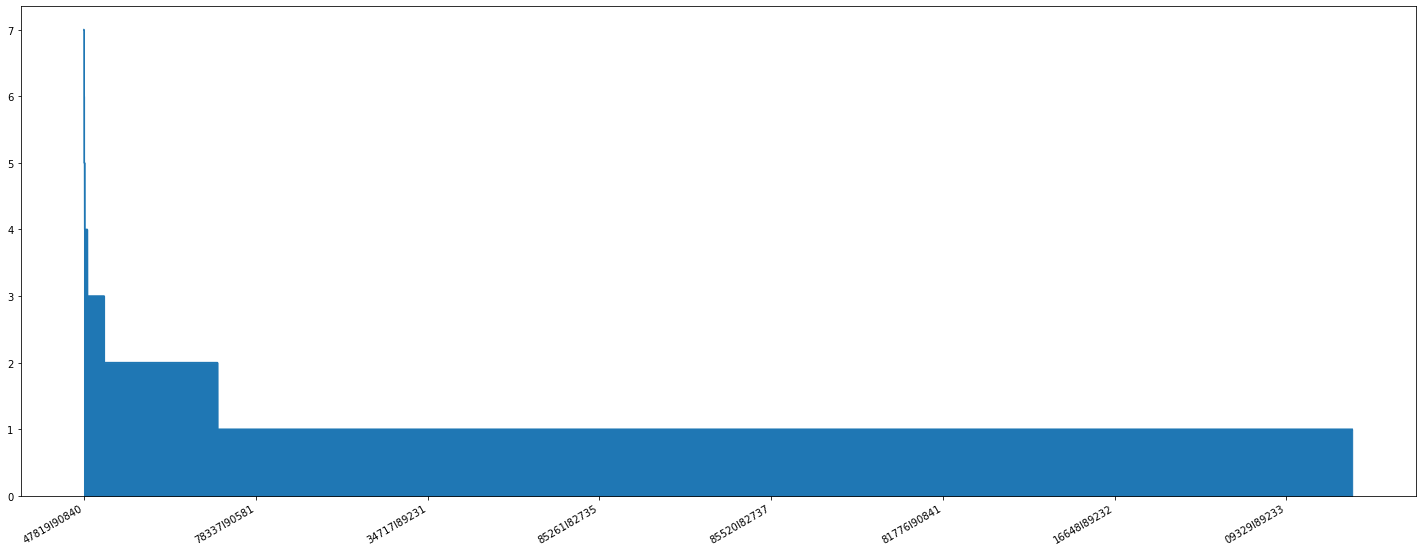

In [39]:
mcd[o[0]].value_counts().plot(kind='area',subplots=True,layout=(1,1),figsize=(25,10))

array([[<AxesSubplot:>]], dtype=object)

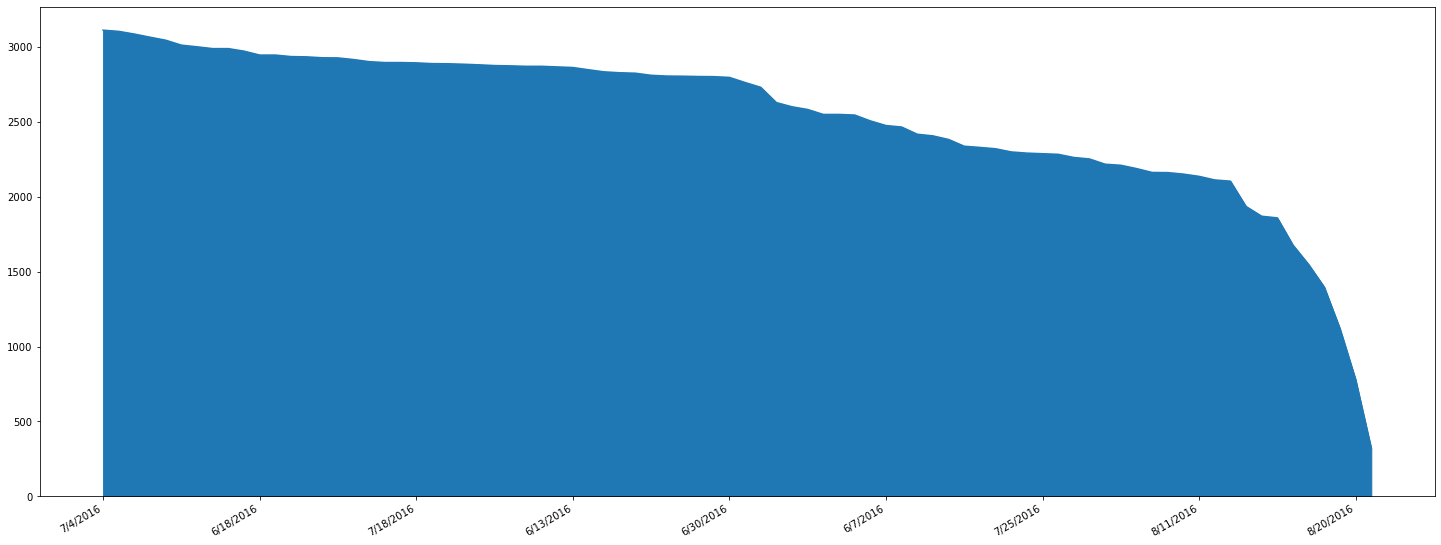

In [40]:
mcd[o[1]].value_counts().plot(kind='area',subplots=True,layout=(1,1),figsize=(25,10))

#### Bivarient Analysis

In [55]:
c=1
plt.figure(figsize=(30,400))
for i in mcd[no].columns:
    plt.subplot(35,1,c)
    sns.scatterplot(x=mcd[i],y=mcd['label'])
    plt.tight_layout(pad=6.0)
    c=c+1
plt.show()

In [ ]:
Observations:
    1.customers with daily_decr30, daily_decr90 with range of 0 to 45000 are failed pay the amount
    2.rental30 nad rental90 with value of 0 to 40000 are failed to pay the micro finance amount 
    3.people who are not paying the micro finance amount are the one who not using the mobile net balance and not regularly using
    the mobile numbers main account also.
    4.cnt_ma_rech90 is high in range for 0 to 200 for the customers who paying the amount in on time
    5.people who using the cnt_da_rech30 are willing to pay the amount with in the given pay time.
    6.customers who are paying on time are taking the maxamnt_loan30 in range of 10000 to 90000
    7.customers paying the loan amount on time are highly using the cnt_loans90 with range of 1000 to 5000
    8.payback30,90 is in range of 0 to 40 for ontime paying customers


In [36]:
mcd[o].value_counts()

msisdn       pyear    
08509I88690  6/16/2016    2
13778I82730  6/12/2016    2
82741I90849  7/23/2016    2
61209I70783  6/25/2016    2
67402I84459  6/20/2016    2
                         ..
66591I90847  6/7/2016     1
66591I90587  6/7/2016     1
66590I89233  7/8/2016     1
             7/25/2016    1
00004I82738  6/6/2016     1
Length: 207497, dtype: int64

In [42]:
a=[[0,1,2],[3,4,5],[6,7,8]]

In [43]:
print([x for y in a for x in y])

[0, 1, 2, 3, 4, 5, 6, 7, 8]


#### calculating the zscore

data with z value less than are equal to 3 is the data which falls under the disturbition curve with 99.97% accurate

In [44]:
# importing the numpy library and stats library
from scipy.stats import zscore

In [47]:
# we have to convert the object data into int type before calculating the zscore
# importing the required libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
for i in mcd.columns:
    if mcd[i].dtype==object:
        d=np.array(mcd[i])
        mcd[i]=LabelEncoder().fit_transform(d.reshape(-1,1))
        print(i)
        

In [47]:
z=np.abs(zscore(mcd))

In [48]:
threshold=3
a=np.where(z>3)
b=np.where(z<=3)

In [49]:
np.where(z<=3)

(array([     0,      0,      0, ..., 207503, 207503, 207503], dtype=int64),
 array([ 0,  1,  2, ..., 29, 30, 31], dtype=int64))

In [50]:
b

(array([     0,      0,      0, ..., 207503, 207503, 207503], dtype=int64),
 array([ 0,  1,  2, ..., 29, 30, 31], dtype=int64))

In [51]:
a[1].size

86869

In [52]:
b[1].size

6553259

In [55]:
mcd1=mcd[(z<=3).all(axis=1)]

In [56]:
mcd1.head(2)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,pyear
0,0,39848,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.0,29.0,19,1,0
1,1,141044,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.0,0.0,9,2,0


In [58]:
print('% data lost =',(b[1].size-mcd.size)*100/mcd.size)

% data lost = -4.298902160630127


#### reducing the skewness

In [59]:
mcd1.skew()

label                   -2.272274
msisdn                   0.000310
aon                      0.959711
daily_decr30             3.947697
daily_decr90             4.264328
rental30                 4.637079
rental90                 4.526656
last_rech_date_ma       21.545661
last_rech_date_da       21.458660
last_rech_amt_ma         3.757402
cnt_ma_rech30            3.284893
sumamnt_ma_rech30        6.393727
medianamnt_ma_rech30     3.459526
medianmarechprebal30    14.822477
cnt_ma_rech90            3.430932
sumamnt_ma_rech90        4.911241
medianamnt_ma_rech90     3.705335
medianmarechprebal90    44.936131
cnt_da_rech30           17.847612
cnt_da_rech90           27.353817
cnt_loans30              2.703839
amnt_loans30             2.965557
maxamnt_loans30         17.623283
medianamnt_loans30       4.555179
cnt_loans90             16.597323
amnt_loans90             3.151119
maxamnt_loans90          1.679115
medianamnt_loans90       4.898515
payback30                8.300832
payback90     

we have to reduce the skewness by +/-0.5

In [60]:
# importing the required libraries
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform

In [61]:
for i in mcd1.iloc[:,1:].columns:
    if mcd1[i].skew()>0.5 or mcd1[i].skew()<-0.5:
        d1=np.array(mcd1[i])
        mcd1[i]=power_transform(d1.reshape(-1,1))

In [62]:
#skewness after implementation if power_transformation
mcd1.skew()

label                  -2.272274
msisdn                  0.000310
aon                    -0.053015
daily_decr30           -0.127811
daily_decr90           -0.117283
rental30               -0.018184
rental90               -0.021750
last_rech_date_ma       2.096300
last_rech_date_da      -3.146373
last_rech_amt_ma       -0.061827
cnt_ma_rech30          -0.000181
sumamnt_ma_rech30      -0.291787
medianamnt_ma_rech30   -0.190252
medianmarechprebal30   -0.100685
cnt_ma_rech90          -0.002492
sumamnt_ma_rech90      -0.192414
medianamnt_ma_rech90   -0.045274
medianmarechprebal90    7.531236
cnt_da_rech30           6.929431
cnt_da_rech90           6.004443
cnt_loans30             0.036429
amnt_loans30            0.001891
maxamnt_loans30        -1.682263
medianamnt_loans30      3.451553
cnt_loans90             0.105839
amnt_loans90           -0.008988
maxamnt_loans90         0.363861
medianamnt_loans90      3.781241
payback30               0.298363
payback90               0.210915
pday      

In [63]:
# we are going to drop the columns with skewness greater than +/-0.5
for i in mcd1.iloc[:,1:]:
    if mcd1[i].skew()<=-0.5 or mcd1[i].skew()>=0.5: 
        mcd1.drop([i],axis=1,inplace=True)
        

In [64]:
# dropping mobile number column as there is no use with the data
mcd1.drop(['msisdn'],axis=1,inplace=True)

In [65]:
mcd1.shape

(207504, 24)

In [66]:
# after skewness has been removed and unnecessary columns has been deleted it finally
# it time to do the scaling
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#minamx scaler reduce the value of data in between 0 and 1

In [67]:
scale=MinMaxScaler()
for i in mcd1.iloc[:,1:].columns:
    d=np.array(mcd1[i])
    scale.fit(d.reshape(-1,1))
    mcd1[i]=scale.transform(d.reshape(-1,1))


In [68]:
mcd1.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,amnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pday,pmonth,pyear
0,0,0.514941,0.485841,0.486284,0.272767,0.287637,0.267079,0.205988,0.171753,0.262015,...,0.506269,0.442022,0.486708,0.486659,0.643356,0.899348,0.855105,0.633333,0.5,0.0
1,1,0.698935,0.619350,0.614773,0.504180,0.507599,0.439345,0.129928,0.211381,0.433991,...,0.352965,0.442022,0.343169,0.486659,1.000000,0.000000,0.000000,0.300000,1.0,0.0


In [69]:
# finally it time to balance the data set after the scaling
x=mcd1.iloc[:,1:]
y=mcd1.iloc[:,0]

In [70]:
# data points size before balancing the data
x.shape,y.shape, y.value_counts()

((207504, 23),
 (207504,),
 1    181633
 0     25871
 Name: label, dtype: int64)

In [71]:
# importing the required library
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)

In [72]:
# data points size aftere balancing the data
x.shape,y.shape, y.value_counts()

((363266, 23),
 (363266,),
 0    181633
 1    181633
 Name: label, dtype: int64)

#### hyper perameter tuning

In [75]:
# importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [76]:
lr,rf,ac,dt=LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()

In [80]:
# for that we are going to import 
from sklearn.model_selection import GridSearchCV
#creating perameters
model_par={
           lr:{'model':lr,'param':{'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    rf:{'model':rf,'param':{'n_estimators':[100,125,150,200],'criterion':["gini", "entropy"],'min_samples_split':[2,2.5,3,3.5]}},
    ac:{'model':ac,'param':{'n_estimators':[50,100,150,200],'learning_rate':[1,2,3,4],'algorithm':['SAMME', 'SAMME.R']}},
    dt:{'model':dt,'param':{'criterion':["gini", "entropy"],'splitter':['best','random'],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': LogisticRegression(),
  'best_score': 0.7652106249554926,
  'best_params': {'penalty': 'l2', 'solver': 'sag'}},
 {'model': RandomForestClassifier(),
  'best_score': 0.94836037924219,
  'best_params': {'criterion': 'entropy',
   'min_samples_split': 2,
   'n_estimators': 200}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.8764405649338206,
  'best_params': {'algorithm': 'SAMME.R',
   'learning_rate': 1,
   'n_estimators': 200}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.9119655473195356,
  'best_params': {'criterion': 'entropy',
   'min_samples_leaf': 1,
   'splitter': 'best'}}]

From the above gridsearch cv results it is clear that the RandomForestClassifier is the best model fo this data set

In [77]:
rfc=RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=200)

the model performs best at random state 45
test accuracy_score of 0.9514131033217104
test roc_auc_score of 0.988316526027336
train accuracy_score of 0.9999685393611917
train roc_auc_score of 0.9999998526476795
cross validation score 94.48916765865901
confusion_matrix of 
 [[51915  2645]
 [ 2650 51770]]
classification_report of 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     54560
           1       0.95      0.95      0.95     54420

    accuracy                           0.95    108980
   macro avg       0.95      0.95      0.95    108980
weighted avg       0.95      0.95      0.95    108980



Text(0.5, 1.0, 'ROC Curve')

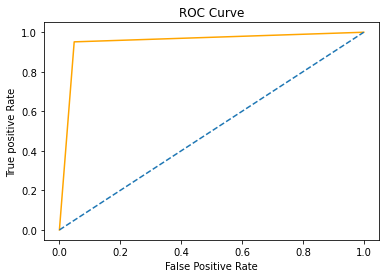

In [78]:
#taking some empty lists
tep,trp,cv,I=[],[],[],[]
for i in range(45,46):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=i)
    rfc.fit(xtrain,ytrain)
    test_pre=rfc.predict(xtest)
    train_pre=rfc.predict(xtrain)
    Tep=accuracy_score(ytest,test_pre)
    Trp=accuracy_score(ytrain,train_pre)
    tep.append(Tep)
    trp.append(Trp)
    I.append(i)
    
values=pd.DataFrame({'Test_acc':tep,'Train_acc':trp,'random_state':I})
values.sort_values(by='Test_acc',inplace=True,ignore_index=True)
print('the model performs best at random state',values.iloc[0,2])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=values.iloc[0,2])
test_pre=rfc.predict(xtest)
train_pre=rfc.predict(xtrain)
test_pre_prob=rfc.predict_proba(xtest)
train_pre_prob=rfc.predict_proba(xtrain)
print("test accuracy_score of",accuracy_score(ytest,test_pre))
print("test roc_auc_score of", roc_auc_score(ytest,test_pre_prob[:,1]))
print("train accuracy_score of",accuracy_score(ytrain,train_pre))
print("train roc_auc_score of", roc_auc_score(ytrain,train_pre_prob[:,1]))
print("cross validation score", cross_val_score(rfc,x,y,cv=3).mean()*100)
print("confusion_matrix of",'\n', confusion_matrix(ytest,test_pre))
print("classification_report of",'\n',classification_report(ytest,test_pre))
fpr,tpr,tr=roc_curve(test_pre, ytest)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")

In [ ]:
#Model saving
import pickle
filename='MCD.pkl'
pickle.dump(rfc,open(filename,'wb'))